# ART1 Network Testing and Visualization

This notebook demonstrates the ART1 (Adaptive Resonance Theory) network implementation for clustering binary patterns.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.art1.art1_network import ART1, run_art1_clustering
from src.preprocessing.binarizer import generate_binary_dataset

## 1. Load Binary Data

Load the preprocessed binary dataset for clustering.

In [2]:
# Load binary dataset
data_path = os.path.join(project_root, "data", "processed", "student_binary.csv")
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (382, 87)
Number of samples: 382
Number of features: 87

First few rows:


,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,famsup_y_no,famsup_y_yes,paid_y_no,paid_y_yes,activities_y_no,activities_y_yes,higher_y_no,higher_y_yes,romantic_y_no,romantic_y_yes
0,0,1,1,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
2,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0


In [3]:
# Convert to numpy array
X_binary = df.values

# Verify all values are binary (0 or 1)
unique_values = np.unique(X_binary)
print(f"Unique values in dataset: {unique_values}")
print(f"Is binary: {np.array_equal(unique_values, [0, 1]) or np.array_equal(unique_values, [0]) or np.array_equal(unique_values, [1])}")

Unique values in dataset: [0 1]
Is binary: True


## 2. Train ART1 Network

Initialize and train the ART1 network with default parameters.

In [4]:
# ART1 parameters
alpha = 0.01        # Choice parameter (small positive value)
rho = 0.8           # Vigilance parameter (0-1, higher = more strict matching)
max_categories = 500  # Maximum number of clusters

# Initialize ART1
art1 = ART1(
    num_features=X_binary.shape[1],
    alpha=alpha,
    rho=rho,
    max_categories=max_categories
)

print(f"ART1 Network initialized with:")
print(f"  - Features: {art1.num_features}")
print(f"  - Alpha (choice): {art1.alpha}")
print(f"  - Rho (vigilance): {art1.rho}")
print(f"  - Max categories: {art1.max_categories}")

ART1 Network initialized with:
  - Features: 87
  - Alpha (choice): 0.01
  - Rho (vigilance): 0.8
  - Max categories: 500


In [5]:
# Train ART1 (this may take a moment)
print("Training ART1 network...\n")
clusters = art1.fit(X_binary)

print(f"\n✓ Training complete!")
print(f"  - Categories created: {art1.num_categories_used}")
print(f"  - Samples clustered: {len(clusters)}")
print(f"  - Unclustered samples: {np.sum(clusters == -1)}")

Training ART1 network...

Processing sample 1/382...
Processing sample 2/382...
Processing sample 3/382...
Processing sample 4/382...
Processing sample 5/382...
Processing sample 6/382...
Processing sample 7/382...
Processing sample 8/382...
Processing sample 9/382...
Processing sample 10/382...
Processing sample 11/382...
Processing sample 12/382...
Processing sample 13/382...
Processing sample 14/382...
Processing sample 15/382...
Processing sample 16/382...
Processing sample 17/382...
Processing sample 18/382...
Processing sample 19/382...
Processing sample 20/382...
Processing sample 21/382...
Processing sample 22/382...
Processing sample 23/382...
Processing sample 24/382...
Processing sample 25/382...
Processing sample 26/382...
Processing sample 27/382...
Processing sample 28/382...
Processing sample 29/382...
Processing sample 30/382...
Processing sample 31/382...
Processing sample 32/382...
Processing sample 33/382...
Processing sample 34/382...
Processing sample 35/382...
Pro

## 3. Analyze Clustering Results

In [6]:
# Cluster statistics
unique_clusters, counts = np.unique(clusters[clusters != -1], return_counts=True)

print(f"Cluster Statistics:")
print(f"  - Total clusters: {len(unique_clusters)}")
print(f"  - Average samples per cluster: {np.mean(counts):.2f}")
print(f"  - Median samples per cluster: {np.median(counts):.0f}")
print(f"  - Largest cluster size: {np.max(counts)}")
print(f"  - Smallest cluster size: {np.min(counts)}")

# Show top 10 largest clusters
print(f"\nTop 10 largest clusters:")
sorted_idx = np.argsort(-counts)[:10]
for idx in sorted_idx:
    print(f"  Cluster {unique_clusters[idx]}: {counts[idx]} samples")

Cluster Statistics:
  - Total clusters: 221
  - Average samples per cluster: 1.73
  - Median samples per cluster: 2
  - Largest cluster size: 5
  - Smallest cluster size: 1

Top 10 largest clusters:
  Cluster 171: 5 samples
  Cluster 19: 4 samples
  Cluster 98: 4 samples
  Cluster 81: 4 samples
  Cluster 23: 3 samples
  Cluster 59: 3 samples
  Cluster 10: 3 samples
  Cluster 3: 3 samples
  Cluster 60: 3 samples
  Cluster 114: 3 samples


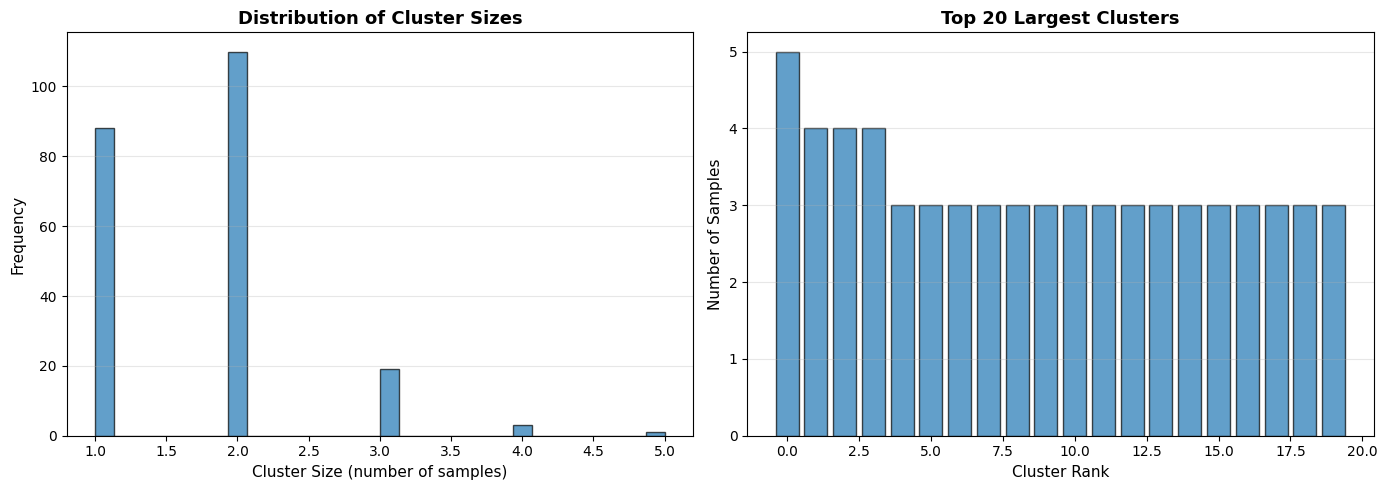

In [7]:
# Visualize cluster size distribution
plt.figure(figsize=(14, 5))

# Histogram of cluster sizes
plt.subplot(1, 2, 1)
plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Cluster Size (number of samples)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Cluster Sizes', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Bar plot of top 20 clusters
plt.subplot(1, 2, 2)
top_n = min(20, len(unique_clusters))
sorted_idx = np.argsort(-counts)[:top_n]
plt.bar(range(top_n), counts[sorted_idx], edgecolor='black', alpha=0.7)
plt.xlabel('Cluster Rank', fontsize=11)
plt.ylabel('Number of Samples', fontsize=11)
plt.title(f'Top {top_n} Largest Clusters', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Examine Category Weights

Visualize the learned weight patterns for different categories.

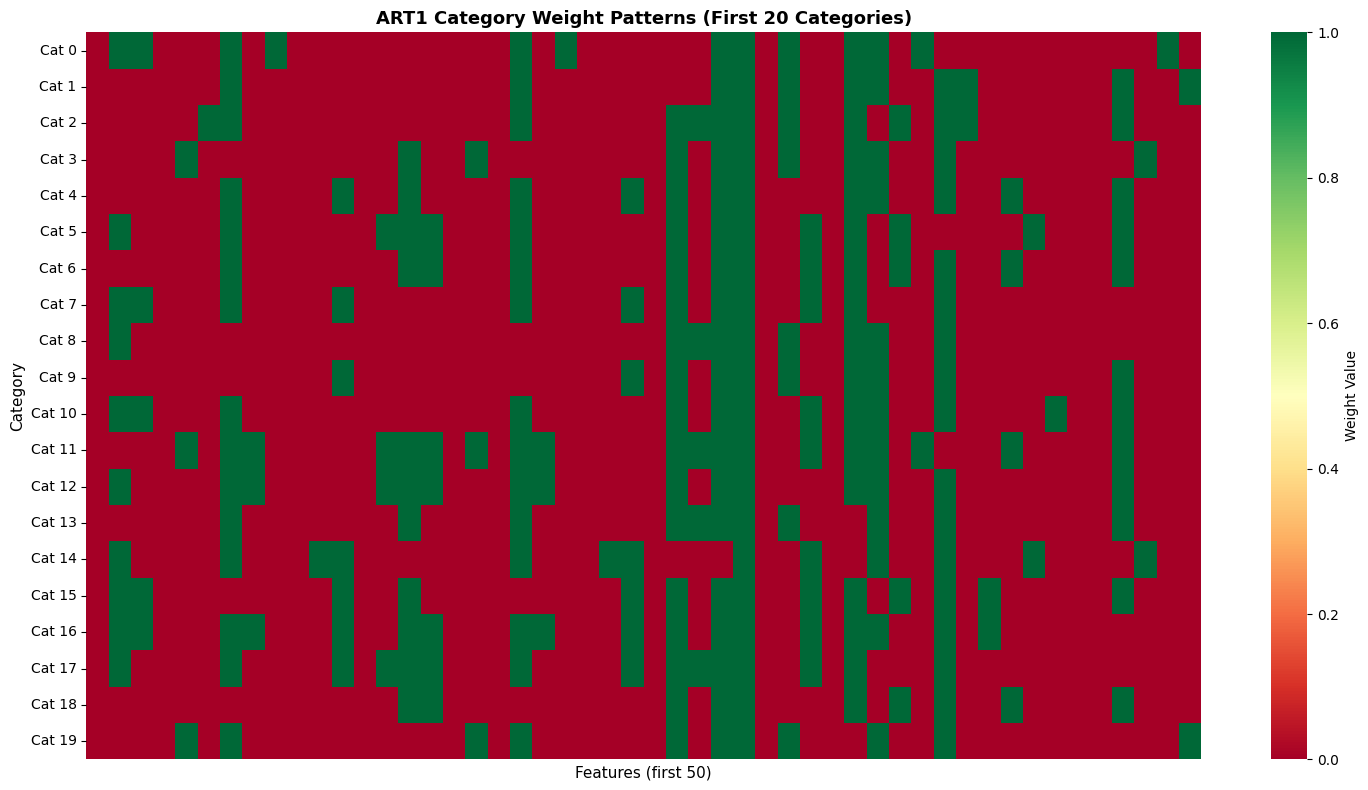

Weight matrix shape: (221, 87)
Weight range: [0.000, 1.000]


In [8]:
# Visualize weight matrix for active categories
active_weights = art1.W[:art1.num_categories_used, :]

# Show first 50 features for first 20 categories (or fewer if less exist)
num_cats_to_show = min(20, art1.num_categories_used)
num_feats_to_show = min(50, art1.num_features)

plt.figure(figsize=(15, 8))
sns.heatmap(
    active_weights[:num_cats_to_show, :num_feats_to_show],
    cmap='RdYlGn',
    cbar_kws={'label': 'Weight Value'},
    xticklabels=False,
    yticklabels=[f'Cat {i}' for i in range(num_cats_to_show)]
)
plt.xlabel(f'Features (first {num_feats_to_show})', fontsize=11)
plt.ylabel('Category', fontsize=11)
plt.title(f'ART1 Category Weight Patterns (First {num_cats_to_show} Categories)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Weight matrix shape: {active_weights.shape}")
print(f"Weight range: [{active_weights.min():.3f}, {active_weights.max():.3f}]")

## 5. Test with Different Vigilance Parameters

Compare clustering behavior with different vigilance (ρ) values.

In [9]:
# Test different vigilance values
vigilance_values = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
results = []

print("Testing different vigilance parameters...\n")

for rho_test in vigilance_values:
    art1_test = ART1(
        num_features=X_binary.shape[1],
        alpha=0.01,
        rho=rho_test,
        max_categories=500
    )
    
    # Use subset for faster testing (first 100 samples)
    test_clusters = art1_test.fit(X_binary[:100])
    
    results.append({
        'rho': rho_test,
        'num_categories': art1_test.num_categories_used,
        'unclustered': np.sum(test_clusters == -1)
    })
    
    print(f"ρ = {rho_test:.2f}: {art1_test.num_categories_used} categories, {np.sum(test_clusters == -1)} unclustered")

results_df = pd.DataFrame(results)
print("\nDone!")

Testing different vigilance parameters...

Processing sample 1/100...
Processing sample 2/100...
Processing sample 3/100...
Processing sample 4/100...
Processing sample 5/100...
Processing sample 6/100...
Processing sample 7/100...
Processing sample 8/100...
Processing sample 9/100...
Processing sample 10/100...
Processing sample 11/100...
Processing sample 12/100...
Processing sample 13/100...
Processing sample 14/100...
Processing sample 15/100...
Processing sample 16/100...
Processing sample 17/100...
Processing sample 18/100...
Processing sample 19/100...
Processing sample 20/100...
Processing sample 21/100...
Processing sample 22/100...
Processing sample 23/100...
Processing sample 24/100...
Processing sample 25/100...
Processing sample 26/100...
Processing sample 27/100...
Processing sample 28/100...
Processing sample 29/100...
Processing sample 30/100...
Processing sample 31/100...
Processing sample 32/100...
Processing sample 33/100...
Processing sample 34/100...
Processing sam

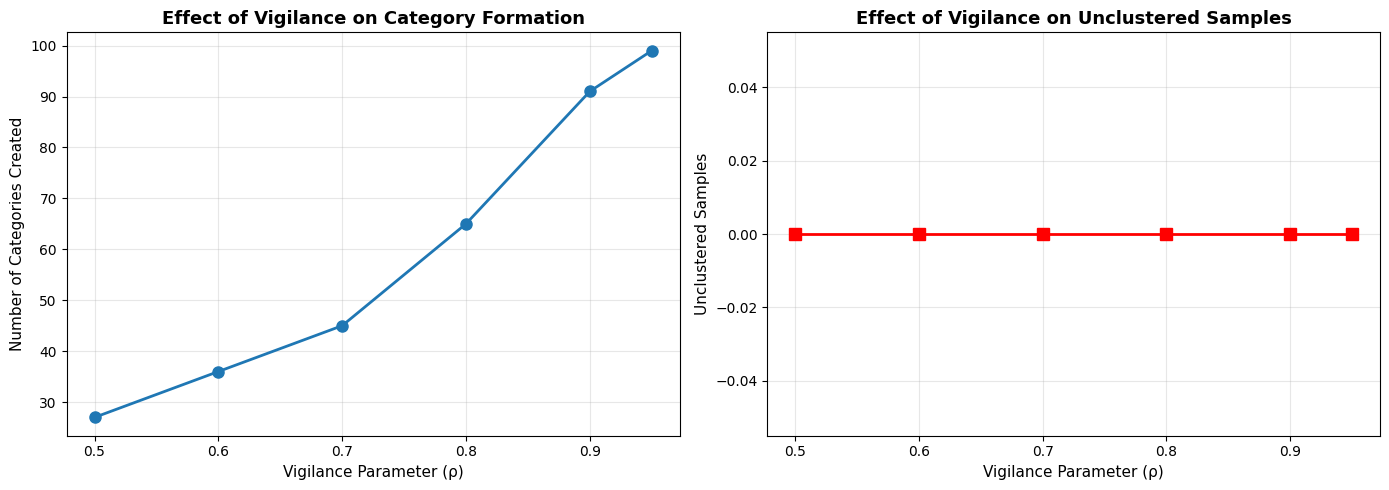


📊 Interpretation:
  - Higher vigilance (ρ) → More categories (stricter matching)
  - Lower vigilance (ρ) → Fewer categories (more generalization)


In [10]:
# Plot vigilance parameter effects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Number of categories vs vigilance
ax1.plot(results_df['rho'], results_df['num_categories'], marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Vigilance Parameter (ρ)', fontsize=11)
ax1.set_ylabel('Number of Categories Created', fontsize=11)
ax1.set_title('Effect of Vigilance on Category Formation', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Unclustered samples vs vigilance
ax2.plot(results_df['rho'], results_df['unclustered'], marker='s', linewidth=2, markersize=8, color='red')
ax2.set_xlabel('Vigilance Parameter (ρ)', fontsize=11)
ax2.set_ylabel('Unclustered Samples', fontsize=11)
ax2.set_title('Effect of Vigilance on Unclustered Samples', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("  - Higher vigilance (ρ) → More categories (stricter matching)")
print("  - Lower vigilance (ρ) → Fewer categories (more generalization)")

## 6. Save and Load Model

In [11]:
# Save the trained model
art1.save_results()

# Save cluster assignments
model_dir = os.path.join(project_root, "models")
os.makedirs(model_dir, exist_ok=True)
np.save(os.path.join(model_dir, "art1_clusters.npy"), clusters)

print("✓ Model and clusters saved successfully!")

ART1 weights saved.
✓ Model and clusters saved successfully!


In [12]:
# Load saved model
art1_loaded = ART1(
    num_features=X_binary.shape[1],
    alpha=alpha,
    rho=rho,
    max_categories=max_categories
)
art1_loaded.load_results()

# Verify weights match
weights_match = np.array_equal(art1.W, art1_loaded.W)
print(f"✓ Model loaded successfully!")
print(f"  Weights match original: {weights_match}")

ART1 weights loaded.
✓ Model loaded successfully!
  Weights match original: True


## 7. Summary

This notebook demonstrated:
- Loading binary data for ART1 clustering
- Training the ART1 network
- Analyzing cluster formation and distribution
- Visualizing learned category weights
- Testing different vigilance parameters
- Saving and loading trained models

### Key Findings:
- ART1 successfully clustered the binary student data
- Vigilance parameter (ρ) controls the granularity of clustering
- Lower ρ → fewer, broader categories
- Higher ρ → more, specific categories